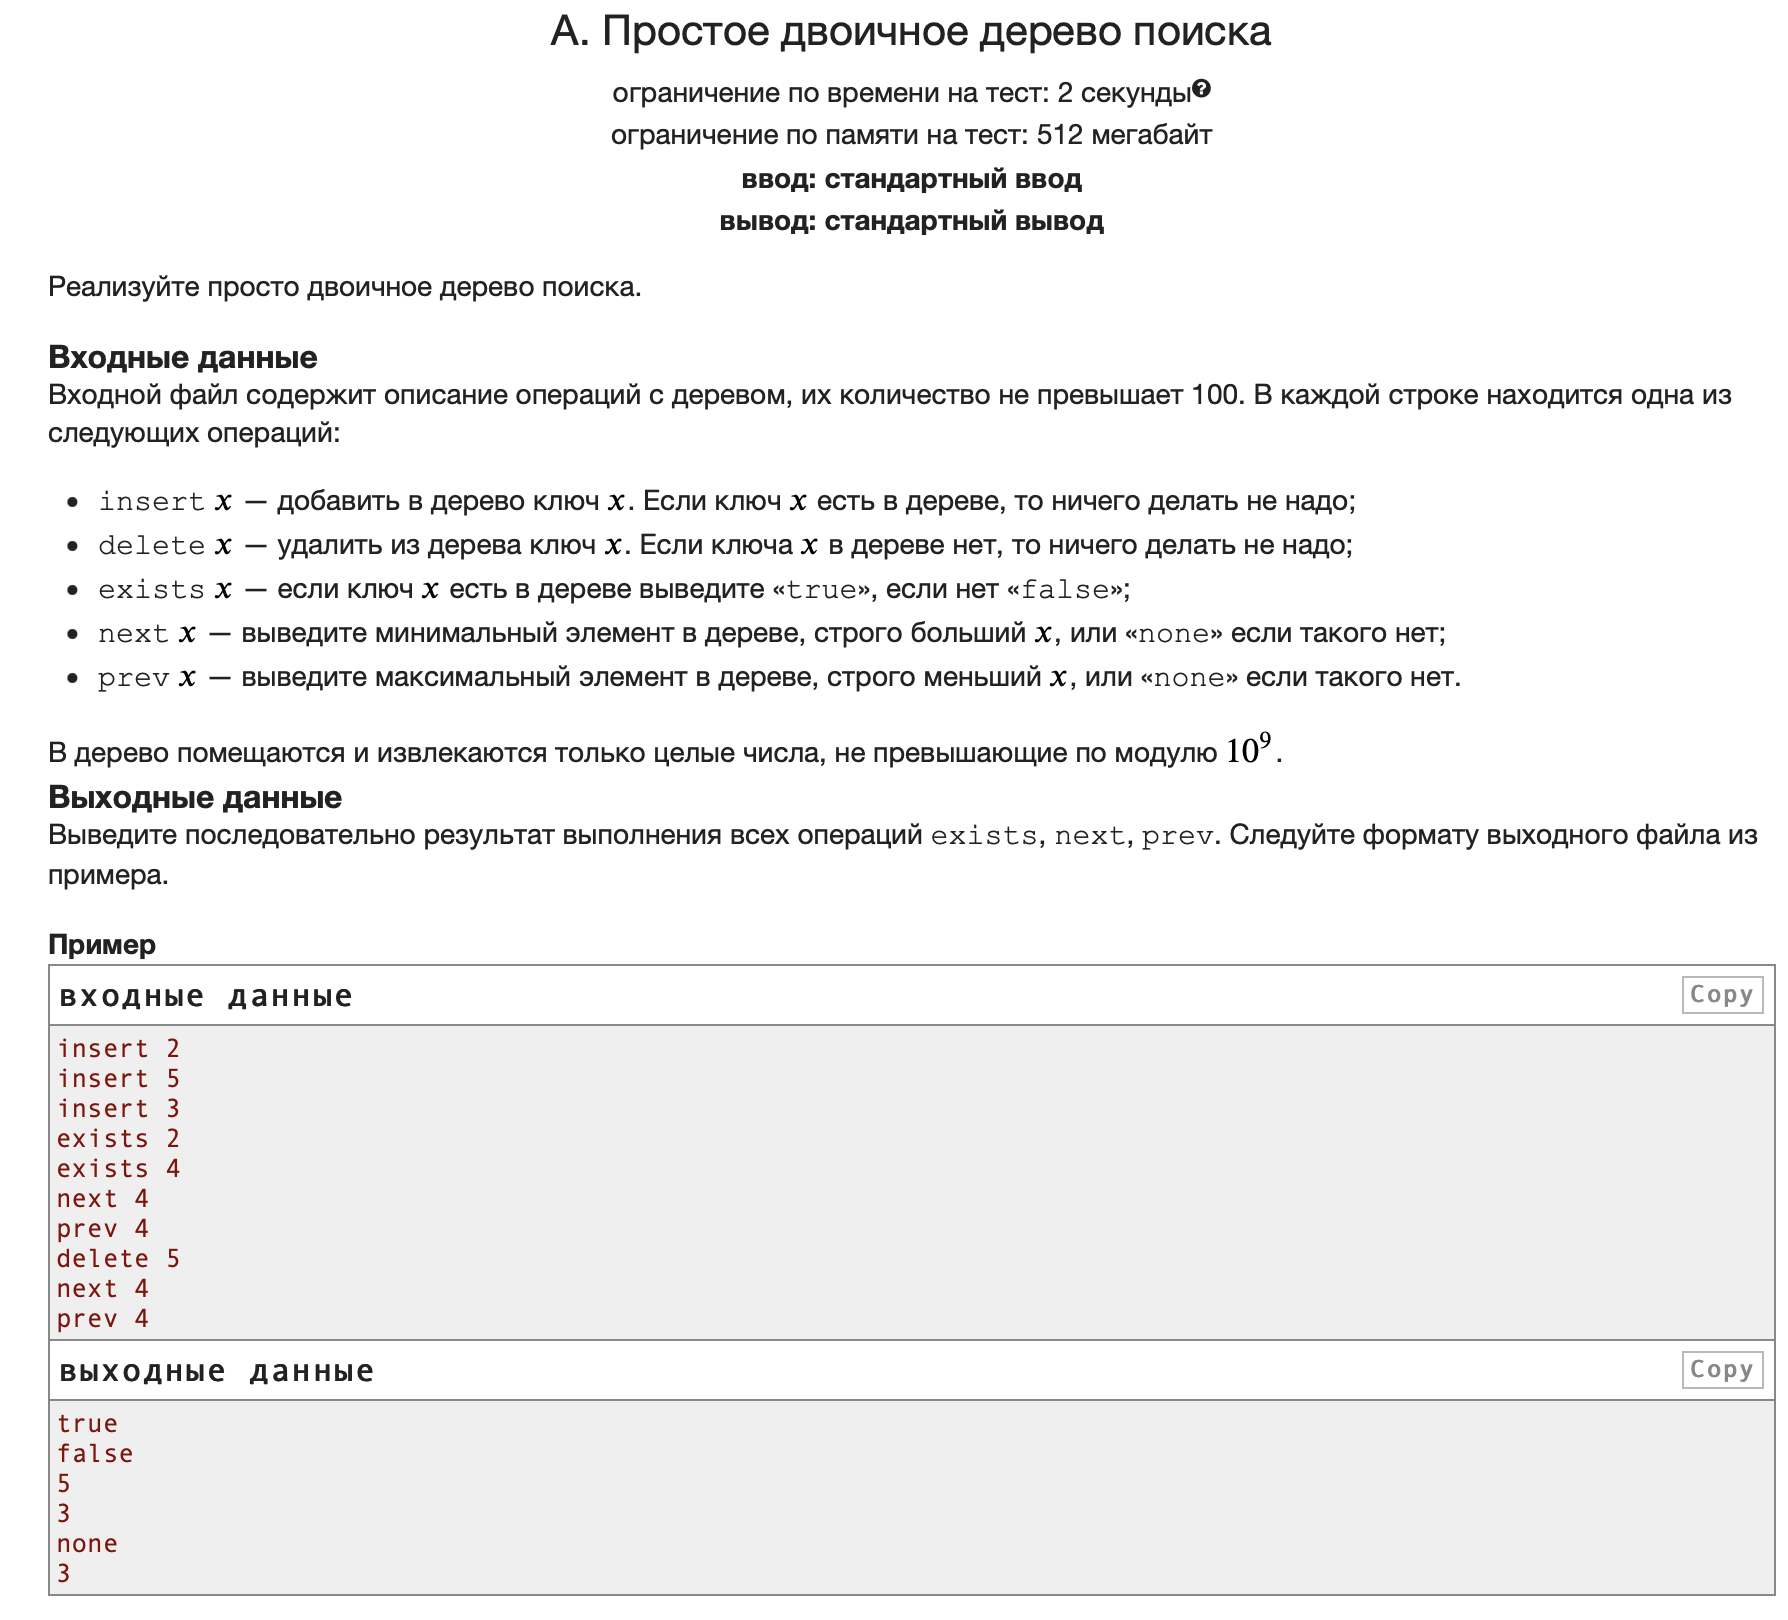

In [69]:
from dataclasses import dataclass
import sys
from typing import TypeVar


Node = TypeVar("Node")

@dataclass
class Node:
    key: int
    left: Node = None
    right: Node = None


def exists(node, key):
    if node is None:
        return False
    if node.key == key:
        return True
    if key < node.key:
        return exists(node.left, key)
    return exists(node.right, key)


def insert(node, key):
    if node is None:
        return Node(key)

    if key < node.key:
        node.left = insert(node.left, key)
    elif key > node.key:
        node.right = insert(node.right, key)
    return node


def delete(node, key):
    if node is None:
        return node

    if key < node.key:
        node.left = delete(node.left, key)
    elif key > node.key:
        node.right = delete(node.right, key)
    else:
        if node.left is None:
            node = node.right
        elif node.right is None:
            node = node.left
        else:
            max_node, parent = find_max(node.left)
            node.key = max_node.key
            if parent:
                parent.right = max_node.left
    return node


def find_max(node):
    parent = None
    while node.right:
        parent = node
        node = node.right
    return node, parent


def find_next(node, key):
    res = None
    while node != None:
        if node.key > key:
            res = node
            node = node.left
        else:
            node = node.right
    if res:
        return res.key
    return None


def find_prev(node, key):
    res = None
    while node != None:
        if node.key < key:
            res = node
            node = node.right
        else:
            node = node.left
    if res:
        return res.key
    return None


class BST:
    def __init__(self):
        self.root = None

    def __call__(self, operation, key):
        key = int(key)
        if operation == 'insert':
            self.root = insert(self.root, key)
        elif operation == 'delete':
            self.root = delete(self.root, key)
        elif operation == 'exists':
            if exists(self.root, key):
                print('true')
            else:
                print('false')
        elif operation == 'next':
            next_key = find_next(self.root, key)
            if next_key is not None:
                print(next_key)
            else:
                print('none')
        else:
            next_key = find_prev(self.root, key)
            if next_key is not None:
                print(next_key)
            else:
                print('none')


binary_search_tree = BST()
for line in sys.stdin:
    binary_search_tree(*line.split())

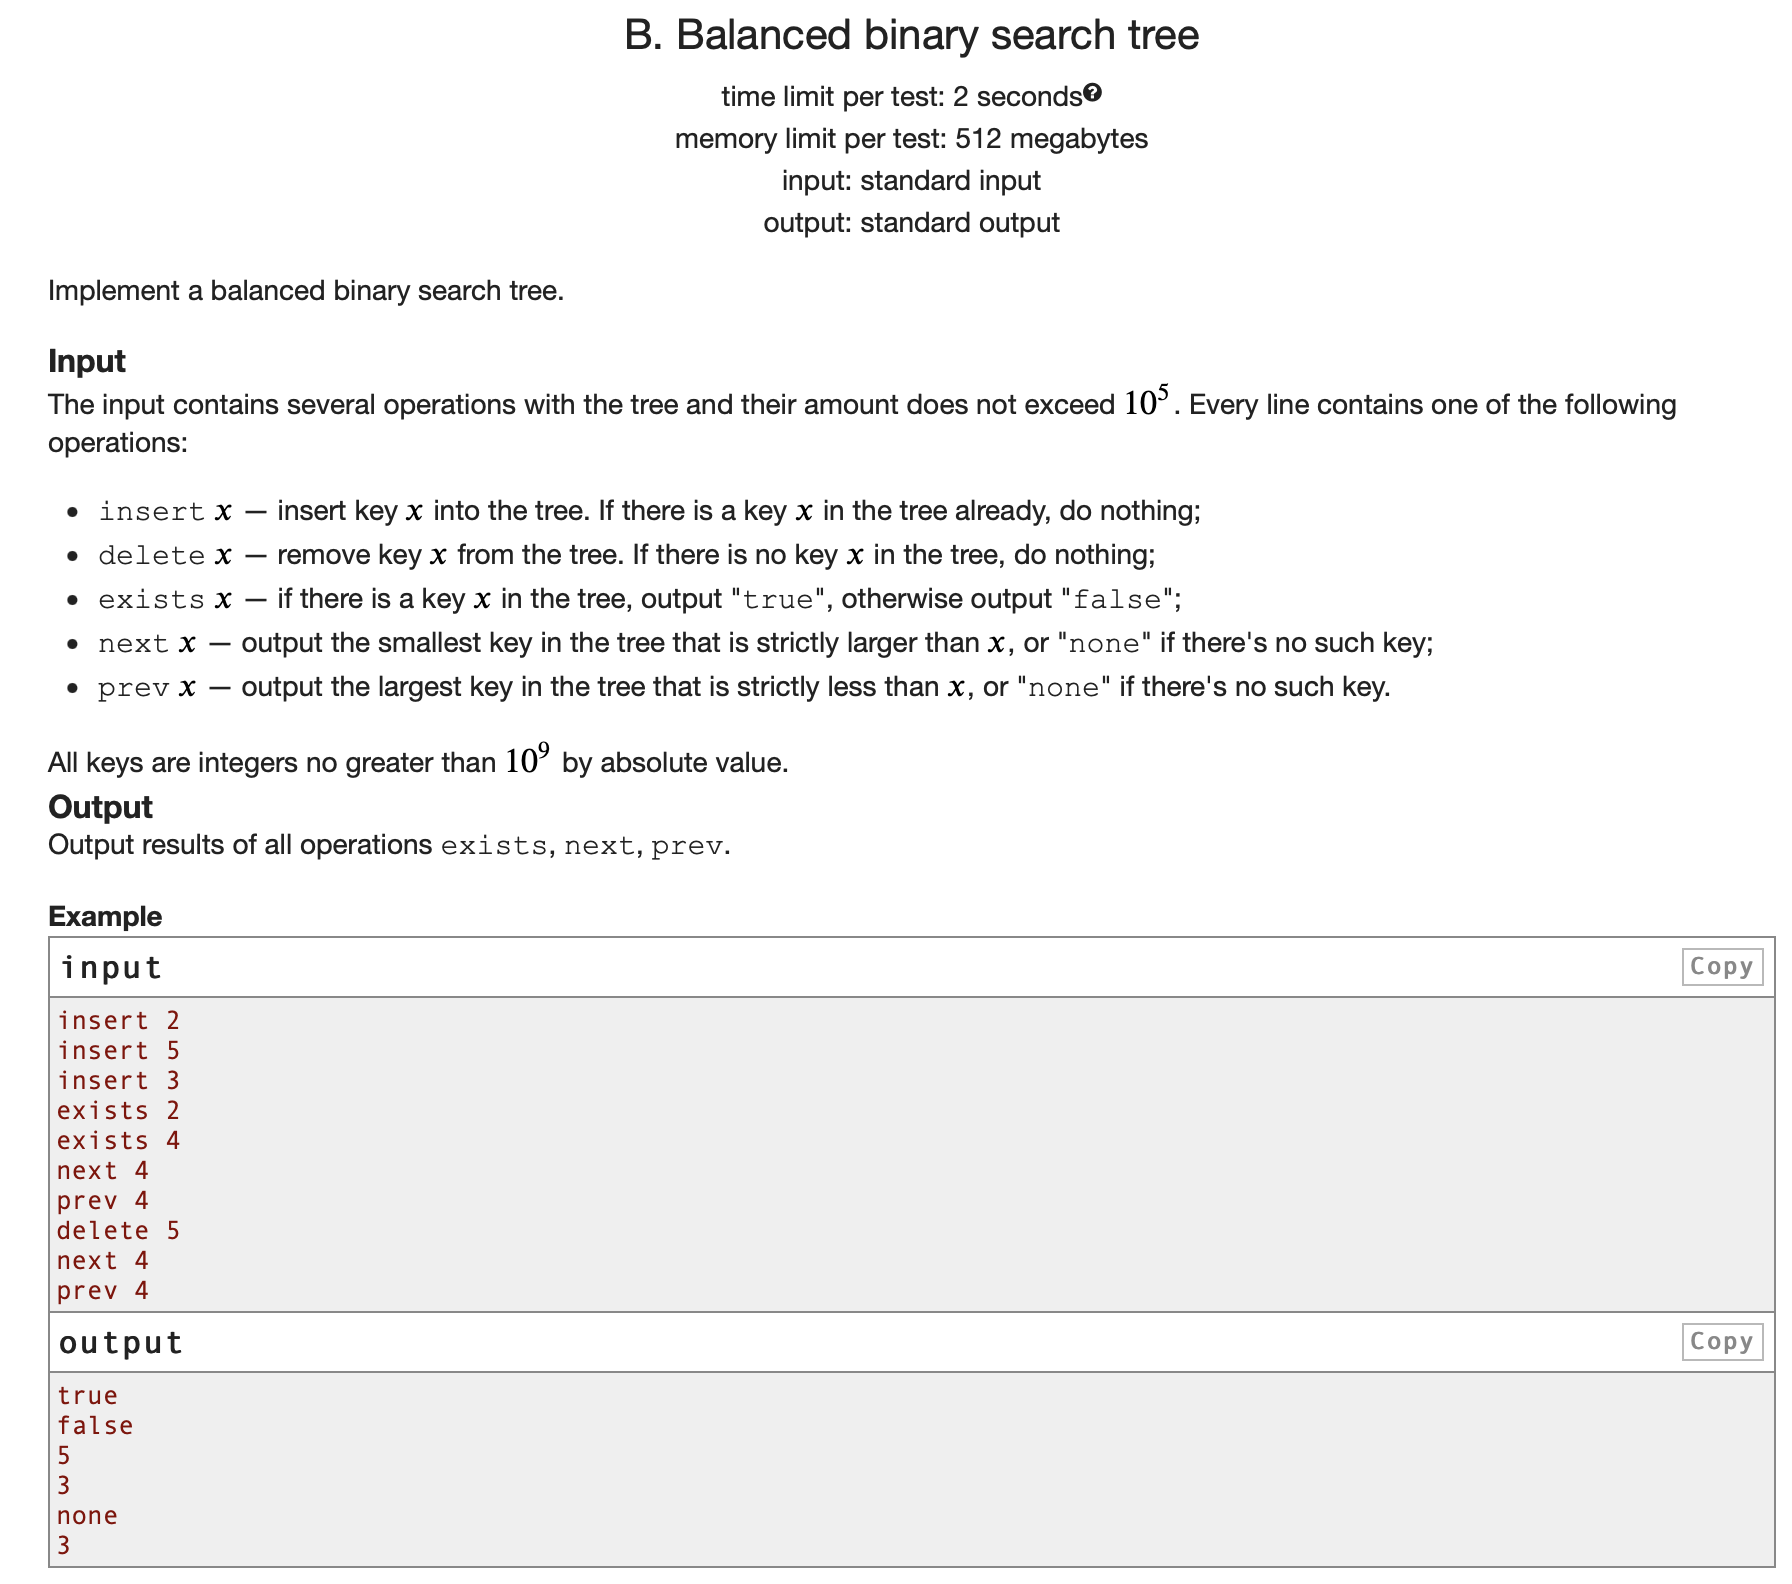